In [1]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

/Users/Joel/Library/Python/3.7/lib/python/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [2]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from datetime import datetime
from backend import Backend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from frontend import Frontend


# Api Source

In [396]:
START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')

In [295]:
tiingo_source = TiingoApiSource(TiingoKey)
data = tiingo_source.fetch_data('BRK-B', START_DATE, END_DATE)

📡 [Tiingo] Fetching data for BRK-B from 2007-10-01 to 2009-02-01...
✓ [Tiingo] Successfully fetched 337 days of data


In [15]:
ashare_source = AshareApiSource()
data = ashare_source.fetch_data('sh000001', START_DATE, END_DATE)

📡 [Sina] Fetching A-share data for sh000001 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2000-01-04 to 2025-09-26 (6239 days)
✓ [Sina] Successfully fetched 6239 trading days of data


In [354]:
fed_source = FederalFinanceAPI()
data = fed_source.fetch_data('tbill_rates', START_DATE, END_DATE)

📡 [Treasury] Fetching Treasury Bill Interest Rates from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 296 records


In [397]:
bls_source = BureauOfLaborStatisticsAPI()
data = bls_source.fetch_data('cpi_inflation', START_DATE, END_DATE)

📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2000 to 2025...
Converting CPI absolute values to year-over-year percentage changes...
✓ Converted to YoY percentage changes. Valid values: 108/120
✓ [BLS] Successfully fetched 120 records


# Crawler



In [11]:
crawler = Crawler(TiingoApiSource(TiingoKey, quota_limit=40))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['IAU']

crawler.crawl(symbols, START_DATE, END_DATE, force=True)

✓ Crawler initialized with TiingoApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2000-01-01 to 2025-10-01
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing IAU...
📡 [Tiingo] Fetching data for IAU from 2000-01-01 to 2025-10-01...
✓ [Tiingo] Successfully fetched 5201 days of data
💾 Writing batch 1 (1 symbols) to database...
📂 Data loaded: 433038 rows
✓ Database initialized: 433038 rows from data/stock_data.pkl
📊 Merged data: 427837 existing + 5201 new = 433038 total rows
💾 Database saved: 433038 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 1 symbols
   IAU


'data/stock_data.pkl'

In [44]:
crawler = Crawler(AshareApiSource(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['SH512170', 'SZ159766', 'SZ159855', 'SH588000', "SZ159869", 'SZ159936', 'SH510050', 'SH000001', 'SH000300']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with AshareApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 9 symbols from 2000-01-01 to 2025-09-27
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (9 symbols)
[1/9] Processing SH512170...
📂 Data loaded: 353917 rows
✓ Database initialized: 353917 rows from data/stock_data.pkl
📡 [Sina] Fetching A-share data for sh512170 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2019-06-17 to 2025-09-26 (1528 days)
✓ [Sina] Successfully fetched 1528 trading days of data
[2/9] Processing SZ159766...
📡 [Sina] Fetching A-share data for sz159766 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-07-23 to 2025-09-26 (1016 days)
✓ [Sina] Successfully fetched 1016 trading days of data
[3/9] Processing SZ159855...
📡 [Sina] Fetching A-share data for sz159855 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-02-26 to 2025-09-26 (1116 days)
✓ [Sina] Successfully fetched 1116 tradi

'data/stock_data.pkl'

In [356]:
crawler = Crawler(FederalFinanceAPI(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['tbill_rates']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with FederalFinanceAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2000-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing TBILL_RATES...
📂 Data loaded: 404720 rows
✓ Database initialized: 404720 rows from data/stock_data.pkl
📡 [Treasury] Fetching Treasury Bill Interest Rates from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 296 records
💾 Writing batch 1 (1 symbols) to database...
📊 Merged data: 404720 existing + 296 new = 405016 total rows
💾 Database saved: 405016 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 1 symbols
   TBILL_RATES


'data/stock_data.pkl'

In [376]:
crawler = Crawler(BureauOfLaborStatisticsAPI(quota_limit=100))

START_DATE = '2020-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['cpi_inflation', 'unemployment_rate']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with BureauOfLaborStatisticsAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 2 symbols from 2020-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (2 symbols)
[1/2] Processing CPI_INFLATION...
📂 Data loaded: 395489 rows
✓ Database initialized: 395489 rows from data/stock_data.pkl
📊 Insufficient data for CPI_INFLATION (bureauoflaborstatisticsapi): 0.0% coverage (240 days, missing 1499 days)
📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2020 to 2025...
✓ [BLS] Successfully fetched 68 records
[2/2] Processing UNEMPLOYMENT_RATE...
📊 Insufficient data for UNEMPLOYMENT_RATE (bureauoflaborstatisticsapi): 0.0% coverage (240 days, missing 1499 days)
📡 [BLS] Fetching Unemployment Rate from 2020 to 2025...
✓ [BLS] Successfully fetched 68 records
💾 Writing batch 1 (2 symbols) to database...
📊 Merged data: 395489 existing + 136 new = 395625 total rows
💾 Database saved: 395625 rows to 

'data/stock_data.pkl'

# Database

In [13]:
# Initialize database
db = Database("data/stock_data.pkl")

# Explore what's available
print(f"Symbols: {db.get_symbols()}")
print(f"Date range: {db.get_date_range()}")

# Database overview
db.info()

📂 Data loaded: 433038 rows
✓ Database initialized: 433038 rows from data/stock_data.pkl
Symbols: ['AAL', 'AAPL', 'ABNB', 'AFRM', 'AGG', 'ALB', 'ALK', 'ALTM', 'AMZN', 'ARKQ', 'ATVI', 'AXP', 'BABA', 'BAC', 'BBY', 'BETZ', 'BIDU', 'BILI', 'BLNK', 'BND', 'BNKU', 'BRK-B', 'BYDDF', 'C', 'CPI_INFLATION', 'CRM', 'CURE', 'DAL', 'DASH', 'DBC', 'DDOG', 'DIDIY', 'DOCU', 'EBAY', 'EMQQ', 'FTEC', 'GLD', 'GOOG', 'GOOGL', 'GS', 'HOOD', 'HUYA', 'IAU', 'IEF', 'INTU', 'IQ', 'JD', 'JETS', 'JOYY', 'JPM', 'JTKWY', 'KNDI', 'LAC', 'LI', 'LUV', 'LYFT', 'MA', 'MDB', 'META', 'MPNGF', 'MS', 'MSFT', 'NDAQ', 'NFLX', 'NIO', 'NIU', 'NKLAQ', 'NVDA', 'ORCL', 'PCRFY', 'PDD', 'PINS', 'PLTR', 'PYPL', 'QQQ', 'QS', 'SAVEQ', 'SH000001', 'SH000300', 'SH510050', 'SH512170', 'SH588000', 'SHOP', 'SHY', 'SMICY', 'SNAP', 'SNOW', 'SPY', 'SZ159766', 'SZ159855', 'SZ159869', 'SZ159936', 'TBILL_RATES', 'TCEHY', 'TIGR', 'TIPS', 'TLT', 'TMF', 'TSLA', 'TWTR', 'UAL', 'UBER', 'UNEMPLOYMENT_RATE', 'UPWK', 'USO', 'V', 'VOO', 'VTI', 'VXUS', 'WFC

In [19]:
# db.backfill_all_split_adjusted_prices()
db.backfill_split_adjusted_prices('IAU')

Adjusting IAU for 2 splits on columns: ['Open', 'High', 'Low', 'Close', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']
  Applied 0.5x split on 2021-05-24
  Applied 10.0x split on 2010-06-24
  Cleaned up Split_Factor field - set all values to 1.0
💾 Database saved: 433038 rows to data/stock_data.pkl
✓ Split-adjusted prices saved for IAU


In [18]:
db.get_split_history("IAU")

,split_factor
date,
2010-06-24,10.0
2021-05-24,0.5


In [381]:
db.backfill_sparse_prices('cpi_inflation')

Creating complete date range for unemployment_rate from 2000-01-01 to 2025-08-01 (freq: D)
Backfilling unemployment_rate on columns: ['Open', 'High', 'Low', 'Close', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']
Original data points: 308, Complete range: 9345
✓ Added 9037 missing dates
💾 Database saved: 413699 rows to data/stock_data.pkl
✓ Backfilled sparse dates and prices saved for unemployment_rate


In [419]:
db.query(symbol='cpi_inflation')

,Close,High,Low,Open,Volume,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,Dividend,Split_Factor,symbol,source,last_updated
2000-01-01,168.800,168.800,168.800,168.800,0.0,168.800,168.800,168.800,168.800,0.0,0.0,1.0,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:30:14.621530
2000-01-02,168.800,168.800,168.800,168.800,NaN,168.800,168.800,168.800,168.800,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:30:14.621530
2000-01-03,168.800,168.800,168.800,168.800,NaN,168.800,168.800,168.800,168.800,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:30:14.621530
2000-01-04,168.800,168.800,168.800,168.800,NaN,168.800,168.800,168.800,168.800,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:30:14.621530
2000-01-05,168.800,168.800,168.800,168.800,NaN,168.800,168.800,168.800,168.800,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:30:14.621530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-28,323.048,323.048,323.048,323.048,NaN,323.048,323.048,323.048,323.048,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:35:23.320123
2025-07-29,323.048,323.048,323.048,323.048,NaN,323.048,323.048,323.048,323.048,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:35:23.320123
2025-07-30,323.048,323.048,323.048,323.048,NaN,323.048,323.048,323.048,323.048,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:35:23.320123
2025-07-31,323.048,323.048,323.048,323.048,NaN,323.048,323.048,323.048,323.048,NaN,NaN,NaN,CPI_INFLATION,bureauoflaborstatisticsapi,2025-09-29 17:35:23.320123


d# Backend

In [14]:
backend = Backend(Database("data/stock_data.pkl"))

📂 Data loaded: 413699 rows
✓ Database initialized: 413699 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl


In [56]:
prices = backend.get_daily_price("SZ159855", '2021-02-01', '2025-09-01')
prices

📂 Retrieved 1097 days of data for SZ159855 from database


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
date,,,,,,,,
2021-02-26,0.979,0.979,0.961,0.971,22271968,1.0,0.971,22271968
2021-03-01,0.985,0.989,0.971,0.987,22340774,1.0,0.987,22340774
2021-03-02,0.985,0.989,0.965,0.971,11035751,1.0,0.971,11035751
2021-03-03,0.978,0.990,0.969,0.989,10615526,1.0,0.989,10615526
2021-03-04,0.975,0.989,0.972,0.976,10074636,1.0,0.976,10074636
...,...,...,...,...,...,...,...,...
2025-08-26,0.999,1.014,0.992,1.010,17868403,1.0,1.010,17868403
2025-08-27,1.010,1.020,0.989,0.990,24385906,1.0,0.990,24385906
2025-08-28,0.989,1.006,0.967,0.999,21214301,1.0,0.999,21214301


In [432]:
backend.get_yoy_cpi_inflation()

✓ Calculated year-over-year CPI changes: 296 data points
📈 Retrieved 296 days of YoY CPI inflation data


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
2001-01-01,3.732227,3.732227,3.732227,3.732227,0.0,1.0,175.100,0.0
2001-02-01,3.533569,3.533569,3.533569,3.533569,0.0,1.0,175.800,0.0
2001-03-01,2.920561,2.920561,2.920561,2.920561,0.0,1.0,176.200,0.0
2001-04-01,3.269119,3.269119,3.269119,3.269119,0.0,1.0,176.900,0.0
2001-05-01,3.615160,3.615160,3.615160,3.615160,0.0,1.0,177.700,0.0
...,...,...,...,...,...,...,...,...
2025-04-01,2.311289,2.311289,2.311289,2.311289,0.0,1.0,320.795,0.0
2025-05-01,2.354897,2.354897,2.354897,2.354897,0.0,1.0,321.465,0.0
2025-06-01,2.669213,2.669213,2.669213,2.669213,0.0,1.0,322.561,0.0
2025-07-01,2.704902,2.704902,2.704902,2.704902,0.0,1.0,323.048,0.0


# FrontEnd

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 413699 rows
✓ Database initialized: 413699 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 1423 days of data for SPY from database
📂 Retrieved 1423 days of data for AAPL from database
📂 Retrieved 1423 days of data for TSLA from database
📂 Retrieved 1423 days of data for GOOGL from database
✓ Calculated year-over-year CPI changes: 296 data points
📈 Retrieved 68 days of YoY CPI inflation data
📊 Retrieved 2040 days of unemployment rate data
💰 Retrieved 2070 days of interest rate data
📈 Plotting comparison chart for 4 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest:   645.05 | Min:   222.95 | Max:   648.92 | Avg:   444.52
  AAPL: Latest:   232.14 | Min:    56.09 | Max:   259.02 | Avg:   161.39
  TSLA: Latest:   333.87 | Min:    24.08 | Max:   479.86 | Avg:   225

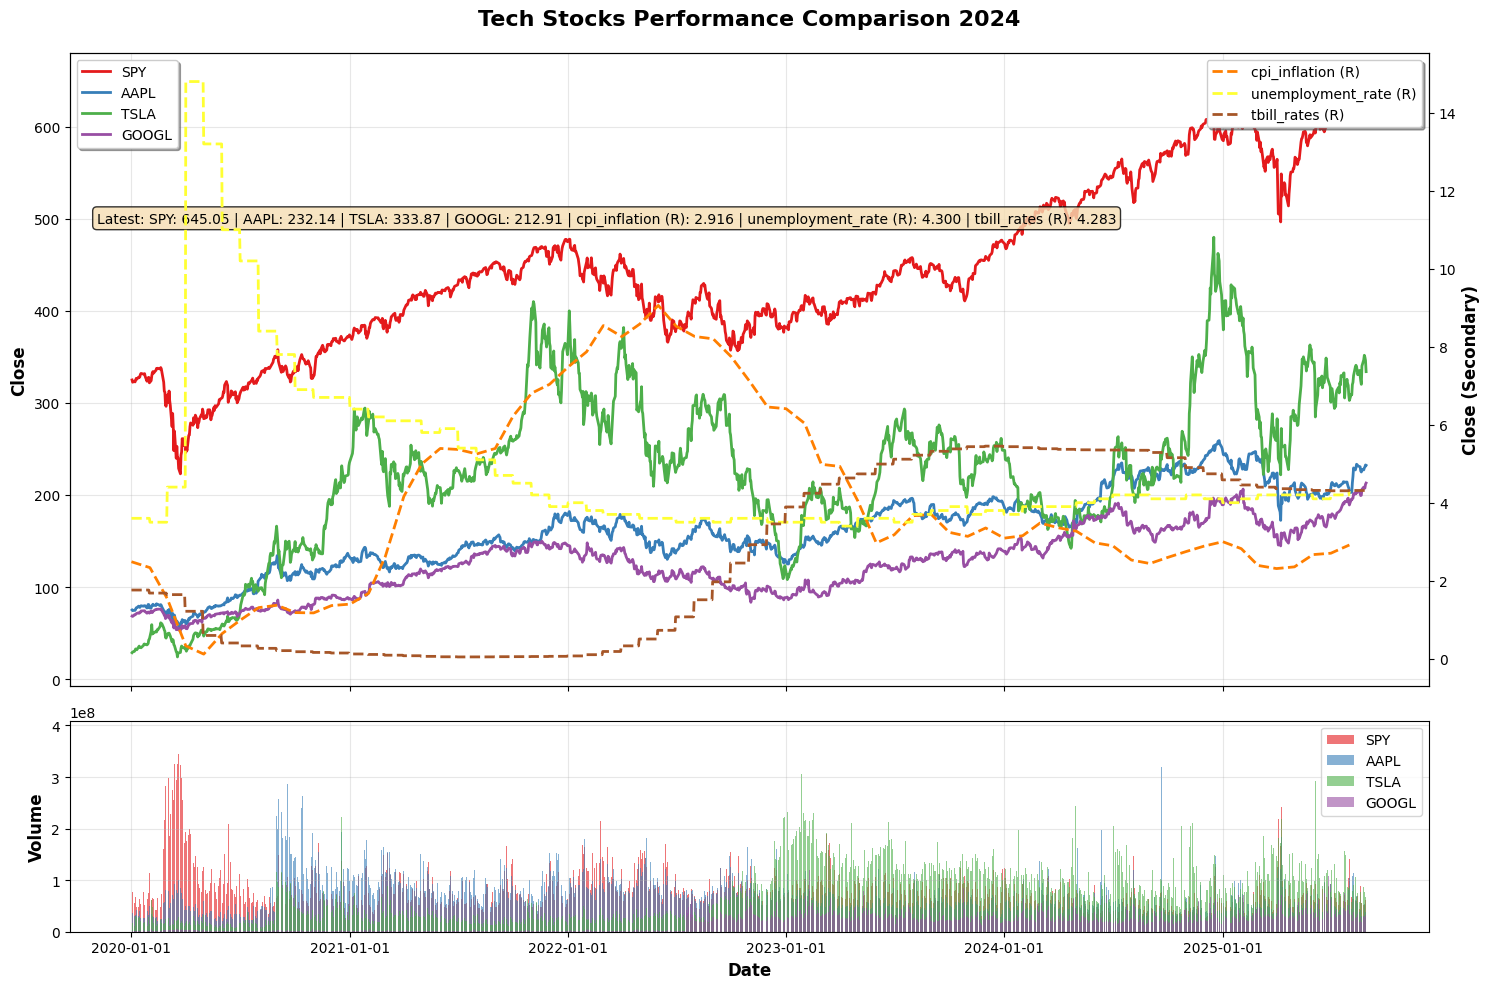

In [47]:

import matplotlib.pyplot as plt
from frontend import Frontend

# Initialize backend and frontend
frontend = Frontend()
backend = Backend(Database("data/stock_data.pkl"))

# Fetch data for multiple stocks
symbols = ['SPY', 'AAPL', 'TSLA', 'GOOGL']
dataframes = []

for symbol in symbols:
    df = backend.get_daily_price(symbol, '2020-01-01', '2025-09-01')
    dataframes.append(df)


# Fetch data for multiple stocks
secondary_symbols = ['cpi_inflation', 'unemployment_rate', 'tbill_rates']
secondary_dataframes = []
secondary_dataframes.append(backend.get_yoy_cpi_inflation('2020-01-01', '2025-09-01'))
secondary_dataframes.append(backend.get_unemployment_rate('2020-01-01', '2025-09-01'))
secondary_dataframes.append(backend.get_interest_rate('2020-01-01', '2025-09-01'))

# Create comparison plot
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    title='Tech Stocks Performance Comparison 2024',
    secondary_dataframes=secondary_dataframes,
    secondary_symbols=secondary_symbols,
)

plt.show()

📈 Plotting comparison chart for 4 symbols...
SPY False
AAPL False
TSLA False
GOOGL False

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest: $  645.05 | Min: $  222.95 | Max: $  648.92 | Avg: $  444.52
  AAPL: Latest: $  232.14 | Min: $   56.09 | Max: $  259.02 | Avg: $  161.39
  TSLA: Latest: $  333.87 | Min: $   24.08 | Max: $  479.86 | Avg: $  225.62
 GOOGL: Latest: $  212.91 | Min: $   52.71 | Max: $  212.91 | Avg: $  125.89
✓ Successfully created comparison chart for 4 symbols
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


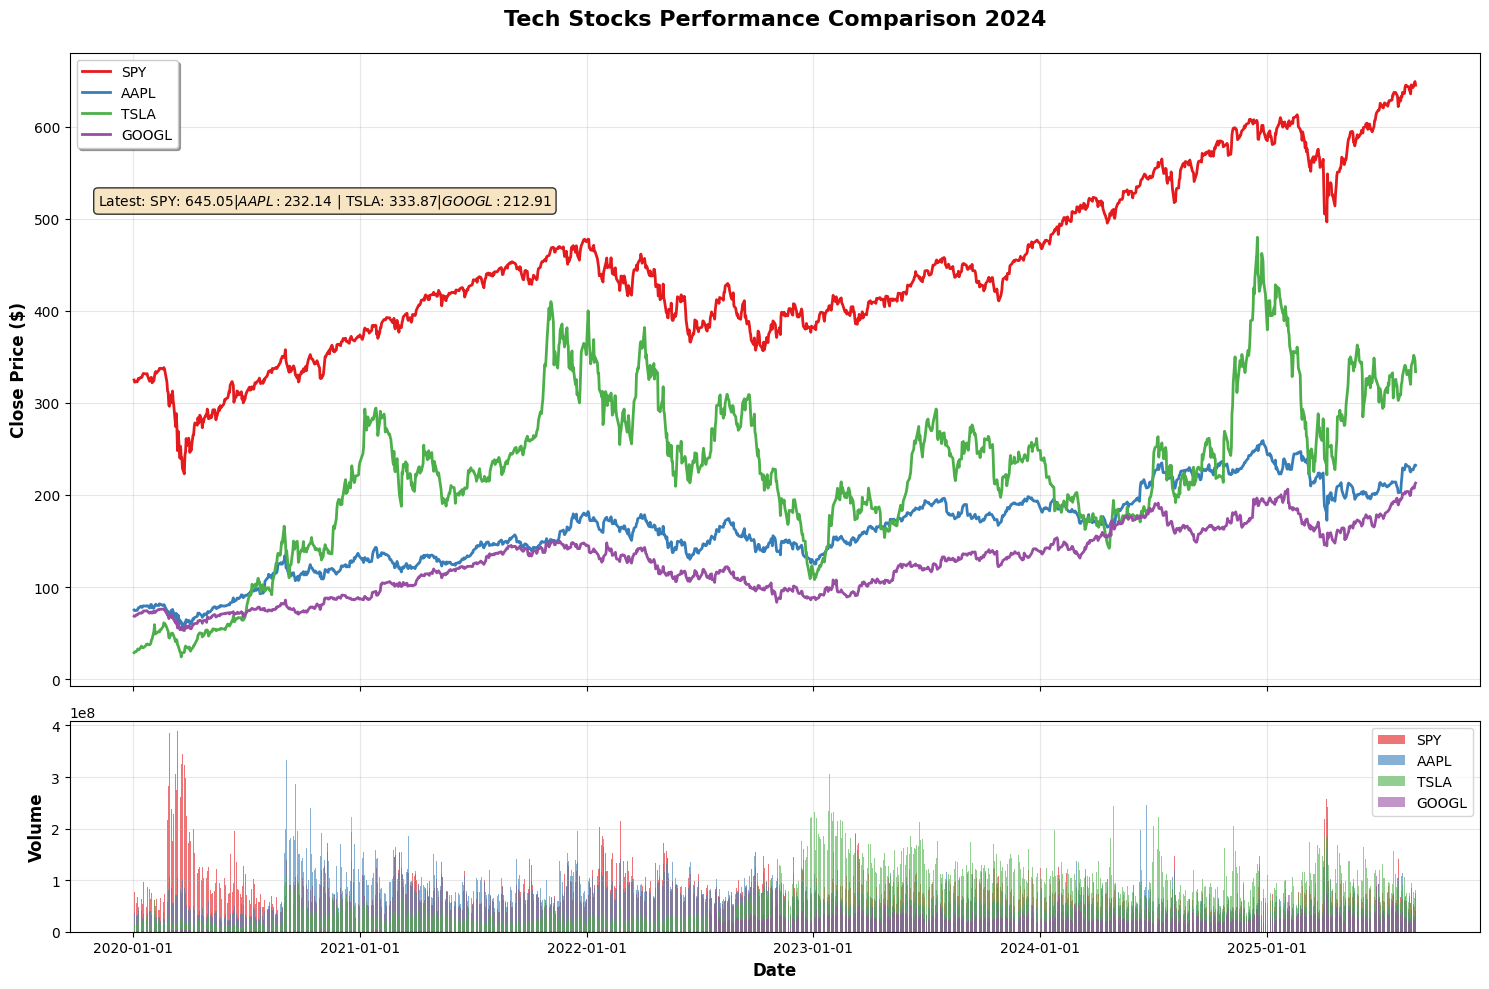

In [19]:
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    # normalize=[True, True, True, True],
    title='Tech Stocks Performance Comparison 2024'
)

plt.show()

# Main

In [81]:
# Chinese stock market

buy_recipe(
    1308252,
    0.05,
    {
        "SH510050": 0.75,
        "SH588000": 0.25,
    }
)

SH510050: buy 49059.450000000004
SH588000: buy 16353.150000000001


⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 433038 rows
✓ Database initialized: 433038 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 2699 days of data for SPY from database
📂 Retrieved 2702 days of data for TLT from database
📂 Retrieved 2702 days of data for IAU from database
📂 Retrieved 2702 days of data for DBC from database
📂 Retrieved 2699 days of data for SPY from database
📂 Retrieved 2702 days of data for TLT from database
📂 Retrieved 2702 days of data for IAU from database
📂 Retrieved 2702 days of data for DBC from database
📈 Plotting comparison chart for 5 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest:    3.203 | Min:    0.890 | Max:    3.246 | Avg:    1.718
   TLT: Latest:    0.702 | Min:    0.650 | Max:    1.348 | Avg:    0.957
   IAU: Latest:    3.164 | Min:    0.883 | Max:    3.164 | A

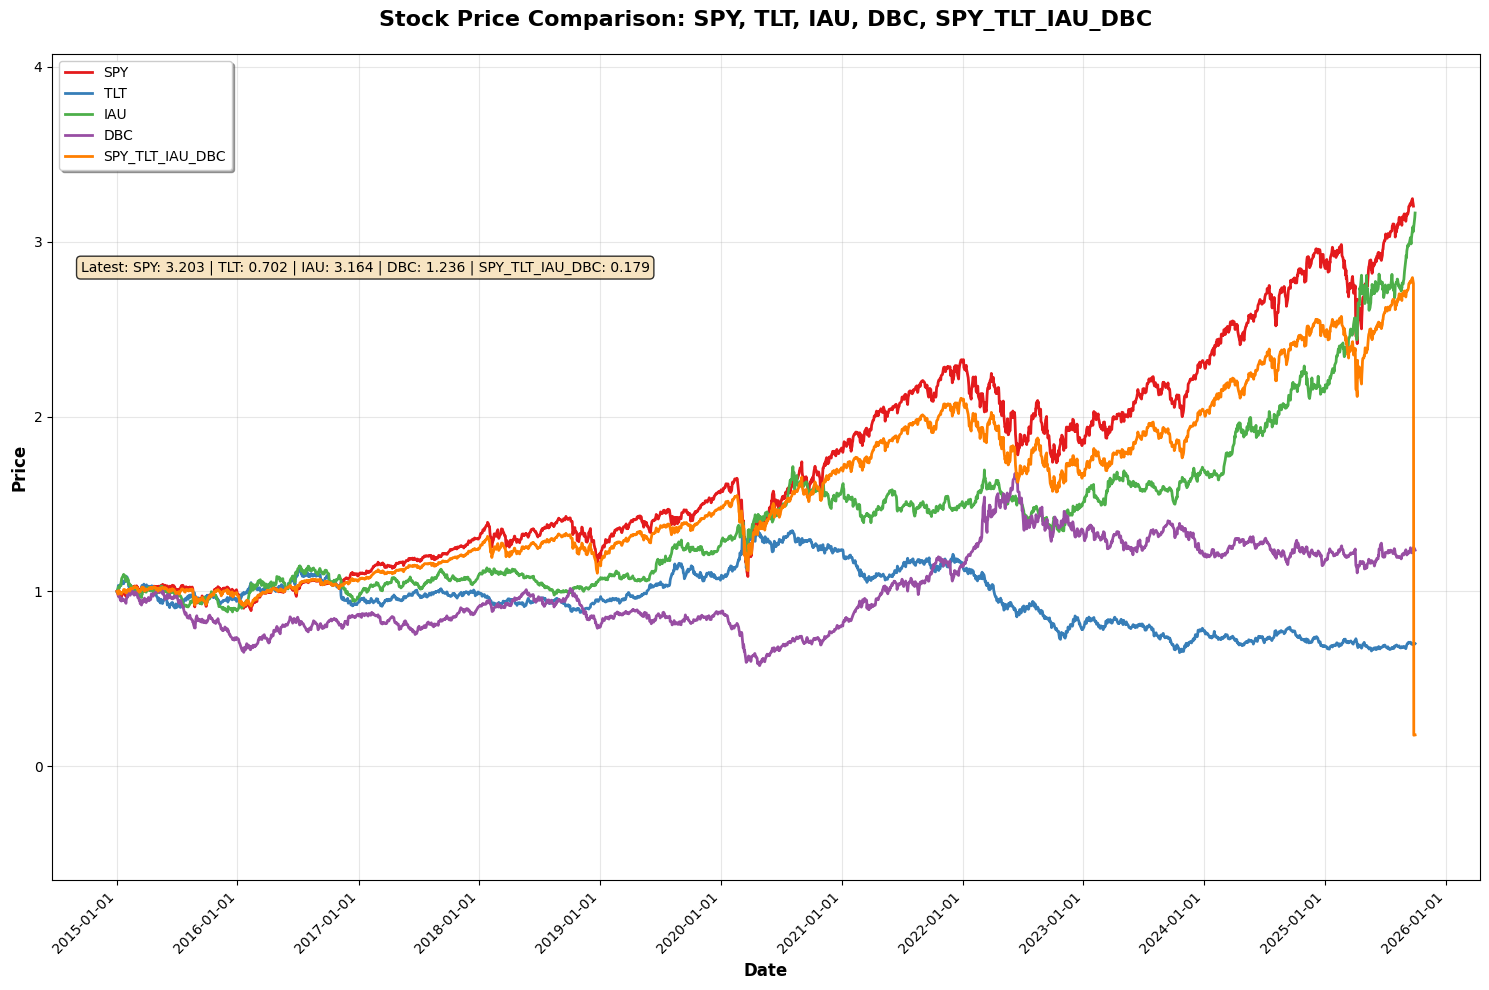

In [21]:
from main import plot_prices, StockConfig, MacroConfig

dfs = plot_prices(
    stocks=[
        StockConfig(symbol='SPY', normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    projected_stocks=[
        StockConfig(symbol="SPY_TLT_IAU_DBC", weights={"SPY":0.6, "TLT":0.2, "IAU": 0.1, "DBC": 0.1}, normalize=True),
    ],
    # environments=MacroConfig(
    #     interest_rate=True,
    #     cpi=True,
    #     unemployment_rate=True,
    # ),
    start_date='2015-01-01', end_date='2025-12-01'
)